In [45]:
history_file_name = 'history_dump.json'
weights_file_name = 'model.h5'
model_json_file_name = 'model.json'

In [46]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

In [47]:
import os.path
from keras.models import model_from_json
from keras.models import load_model

model_loaded = False
if os.path.isfile(model_json_file_name):
    classifier = load_model(weights_file_name)
    model_loaded = True
else:   
    classifier = Sequential()
    classifier.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size=(2, 2)))

    classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size=(2, 2)))

    classifier.add(Flatten())

    classifier.add(Dense(units = 64, activation = 'relu'))

    classifier.add(Dropout(0.5))

    # output layer 
    classifier.add(Dense(1))
    classifier.add(Activation('sigmoid'))

In [48]:
if not model_loaded:
    # Compilar el modelo
    classifier.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33856)             0         
__________

In [50]:
from keras.preprocessing.image import ImageDataGenerator
import os

#rescale para achicar los valores del RGB (que pasen a ser de 0 a 1 en vez de 0 a 255)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

cwd = os.getcwd()
# también se resizean las imagenes a 200x200
target_size = (200, 200)
batch_size = 32
training_set = train_datagen.flow_from_directory(cwd + '/Dataset/train/',target_size=target_size, batch_size=batch_size, shuffle=True, class_mode="binary")

test_set = test_datagen.flow_from_directory(cwd + '/Dataset/test/',target_size=target_size, batch_size=batch_size,shuffle=True,class_mode="binary")
print(training_set.class_indices)

Found 290 images belonging to 2 classes.
Found 124 images belonging to 2 classes.
{'class0': 0, 'class1': 1}


In [51]:
import json
import os

if os.path.isfile(history_file_name):
    h = json.load(open(history_file_name, 'r'))
else:
    history = classifier.fit_generator(training_set,steps_per_epoch = 800, epochs = 25, validation_data = test_set, validation_steps = 100)
    h = history.history
    with open(history_file_name, 'w') as f:
        json.dump(h, f)
    classifier.save(weights_file_name)


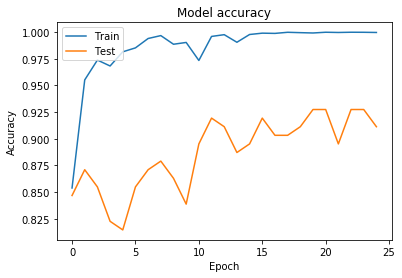

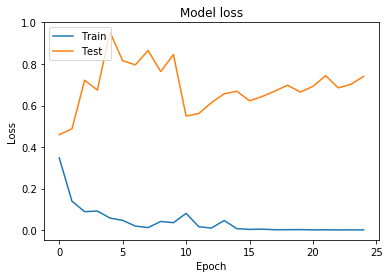

In [52]:
import matplotlib.pyplot as plt
    
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [53]:
def predict(image_sample):
    result = classifier.predict(image_sample)
    prediction = 'Está Nicolas Cage:' if result[0][0] == 1 else 'No está Nicolas Cage:'
    print(prediction)
    img = Image(file, width = "400", height = "400")
    display(img)
    print("\n")
    print("\n")

Está Nicolas Cage:


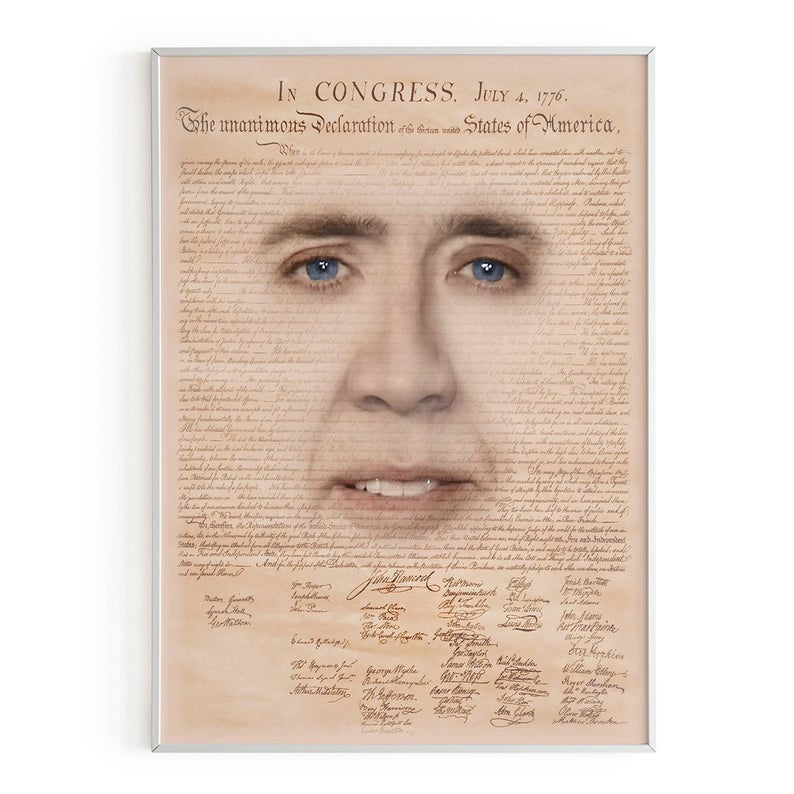





No está Nicolas Cage:


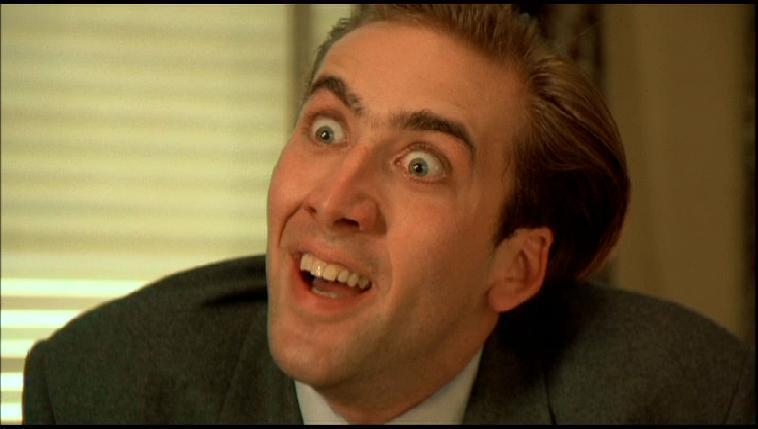





No está Nicolas Cage:


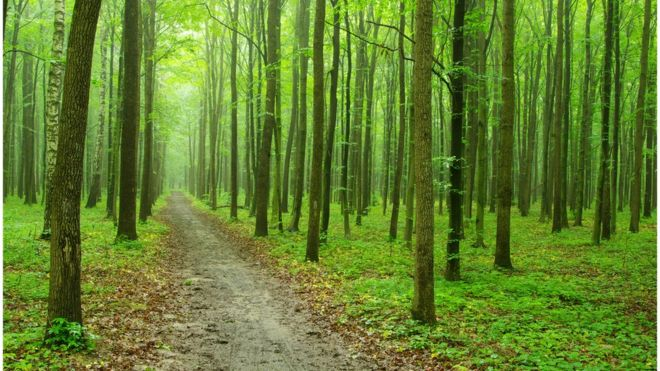





Está Nicolas Cage:


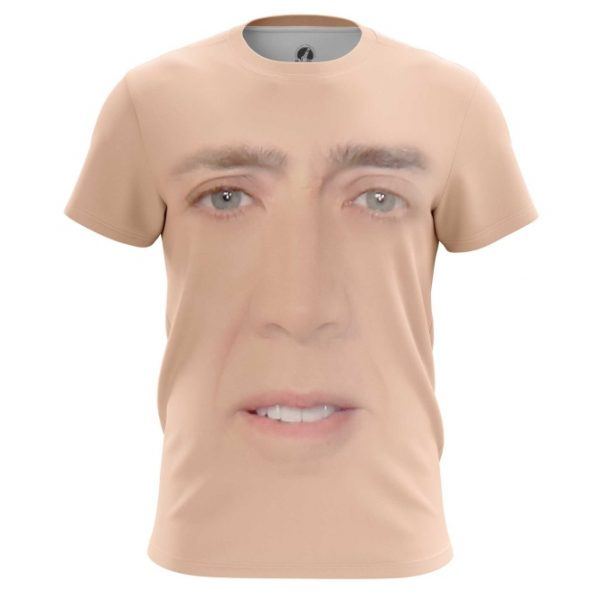





No está Nicolas Cage:


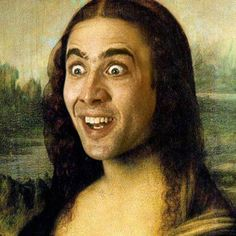





Está Nicolas Cage:


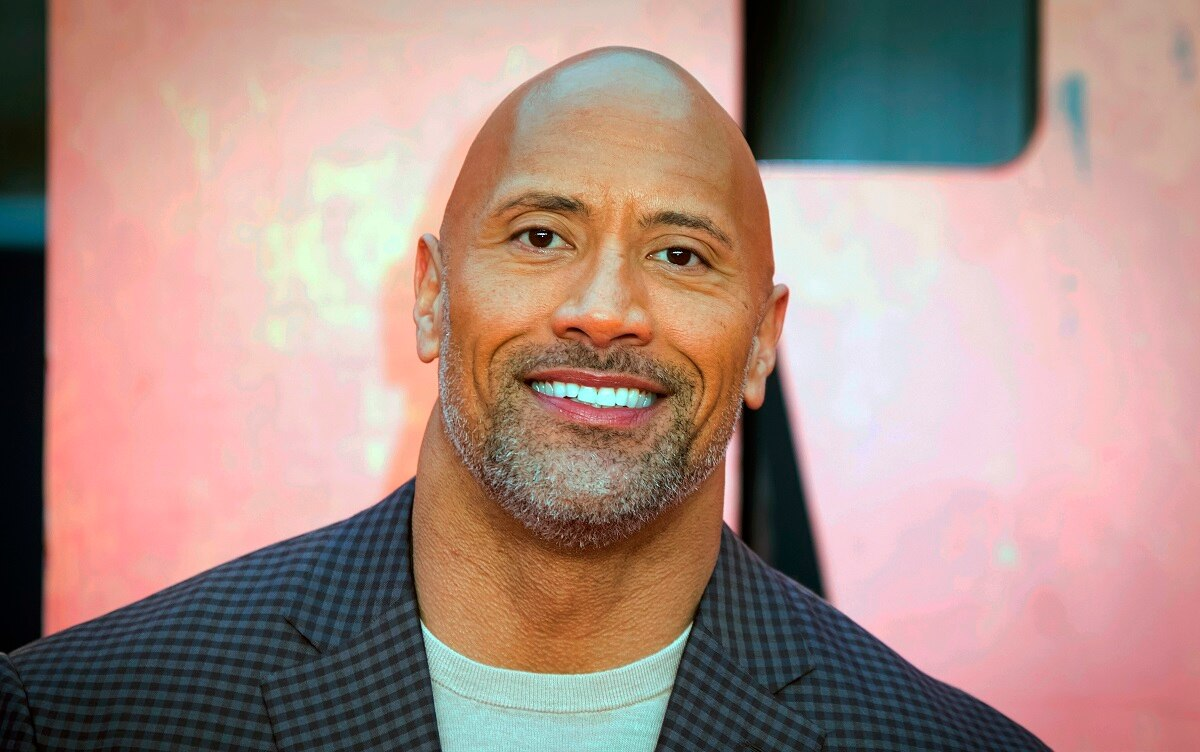





Está Nicolas Cage:


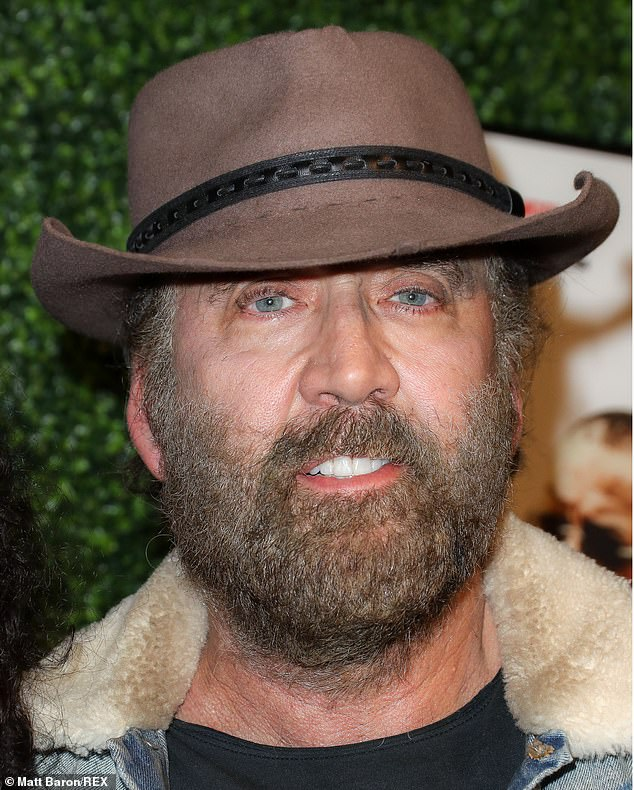





Está Nicolas Cage:


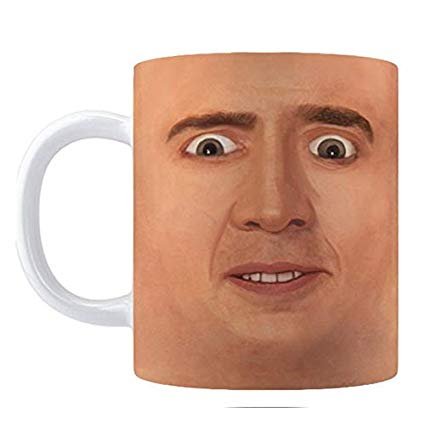





Está Nicolas Cage:


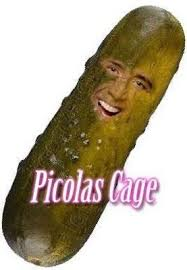





Está Nicolas Cage:


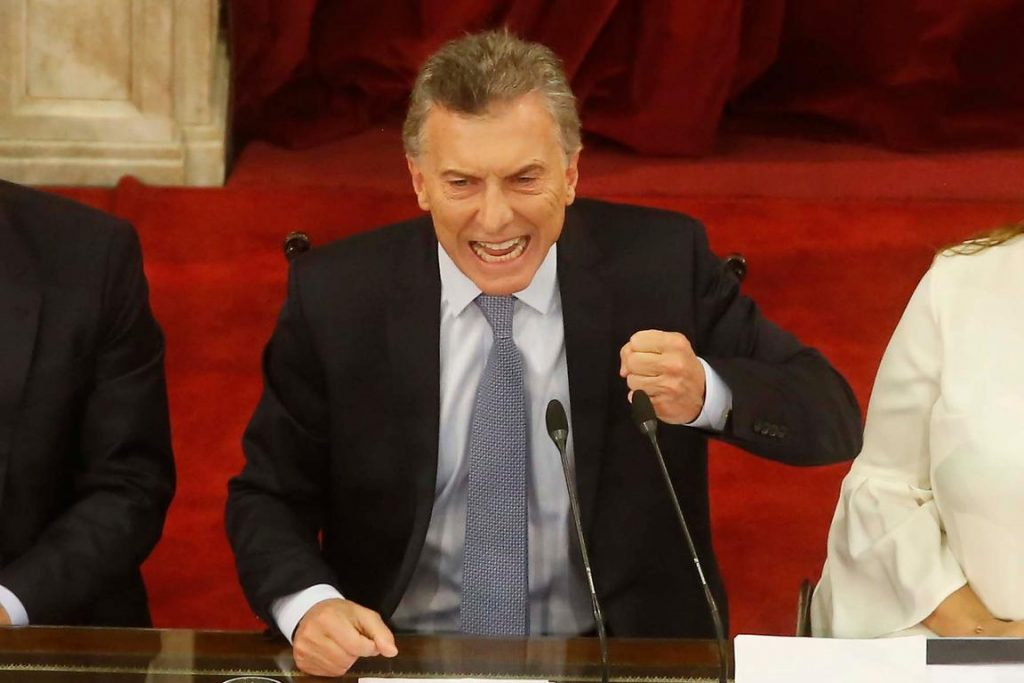





No está Nicolas Cage:


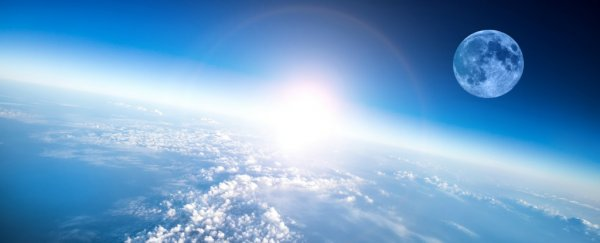





Está Nicolas Cage:


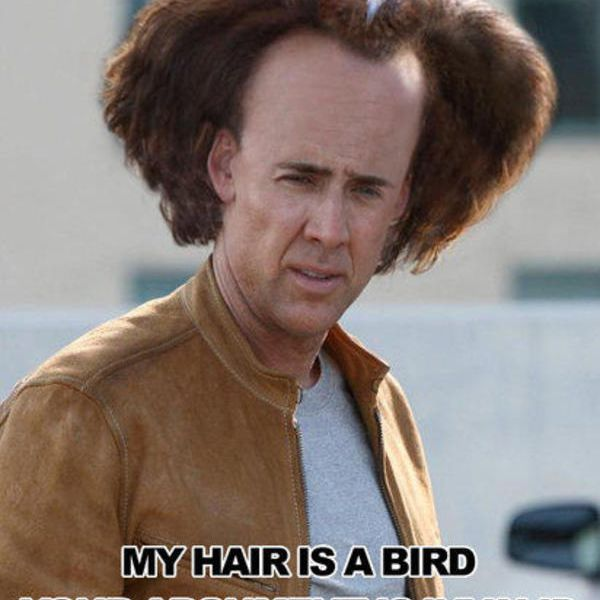





Está Nicolas Cage:


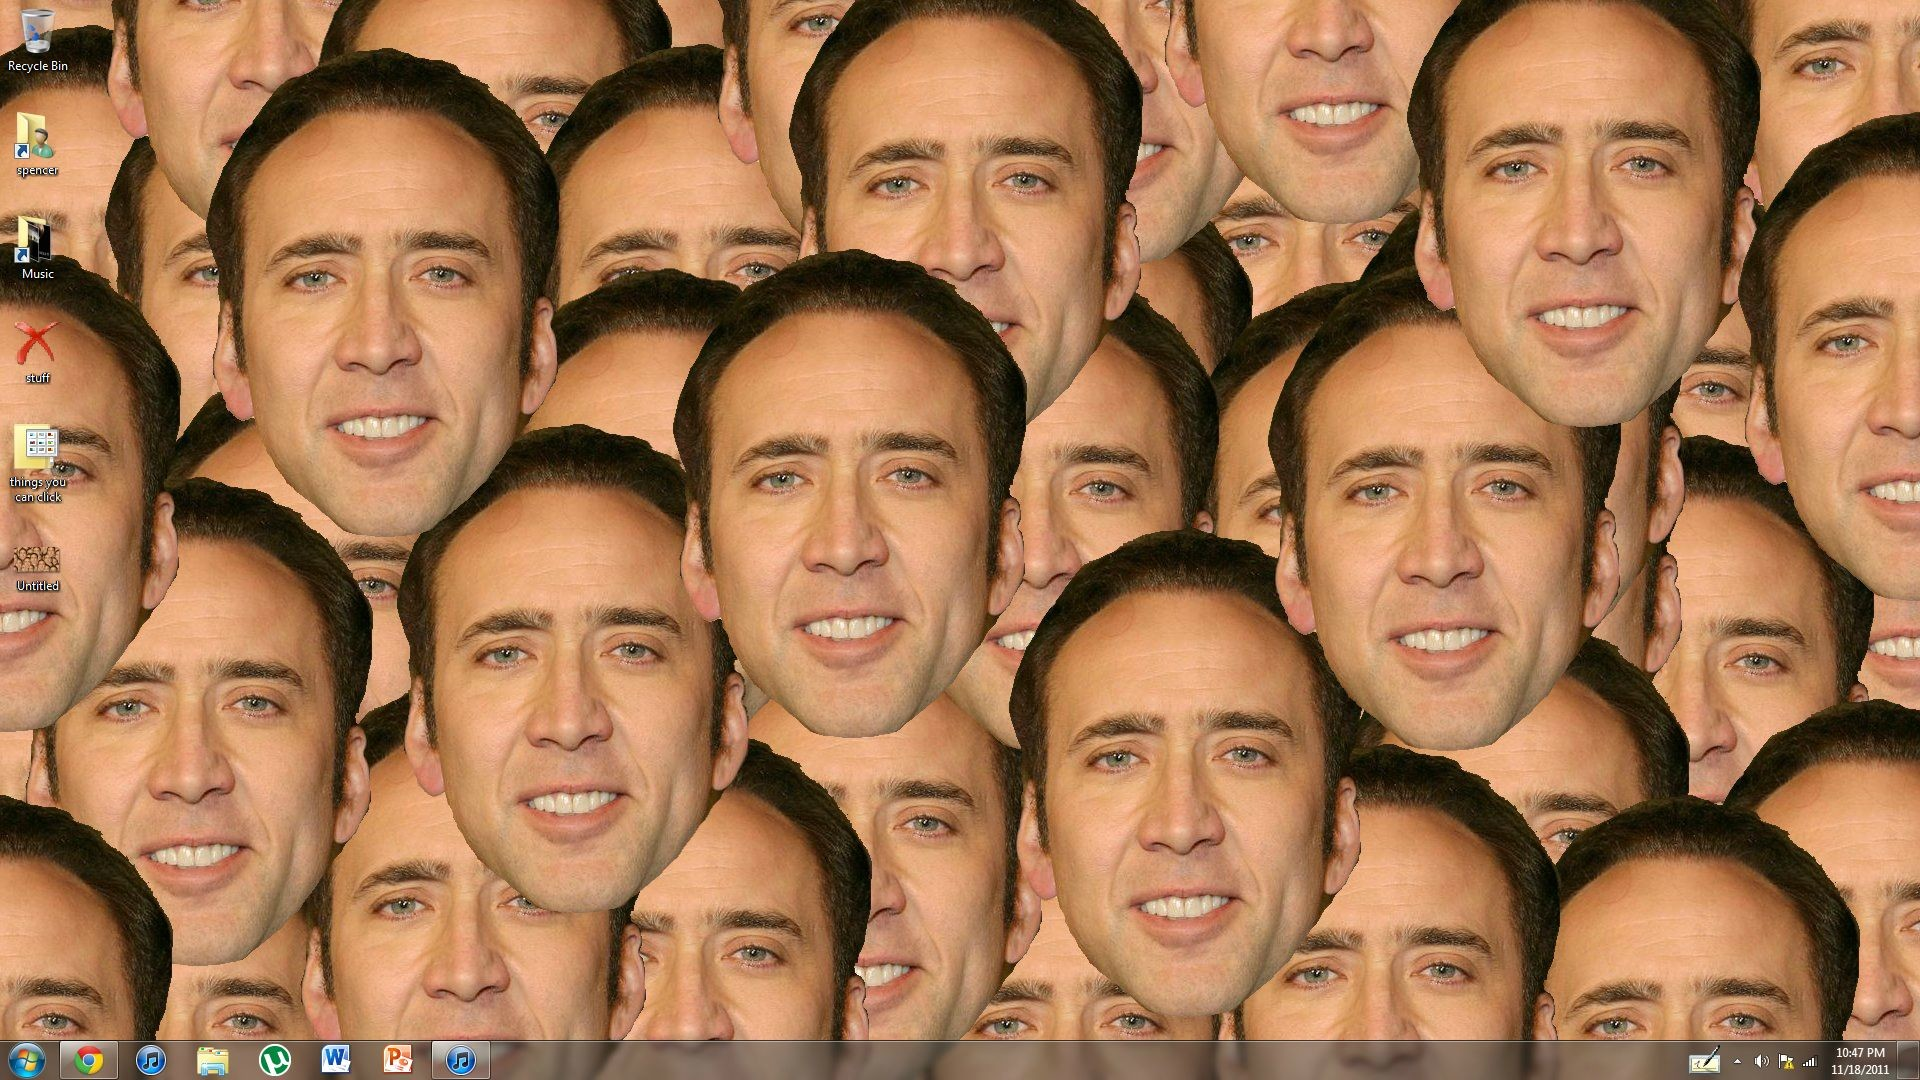





Está Nicolas Cage:


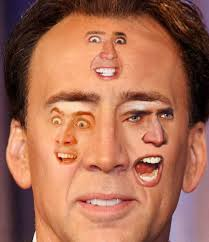





Está Nicolas Cage:


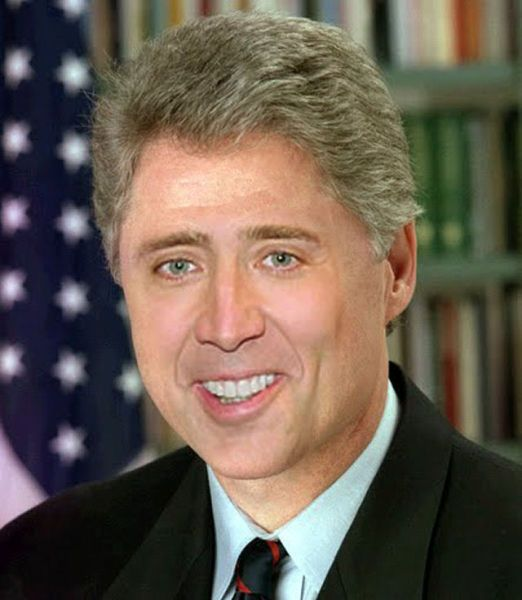





No está Nicolas Cage:


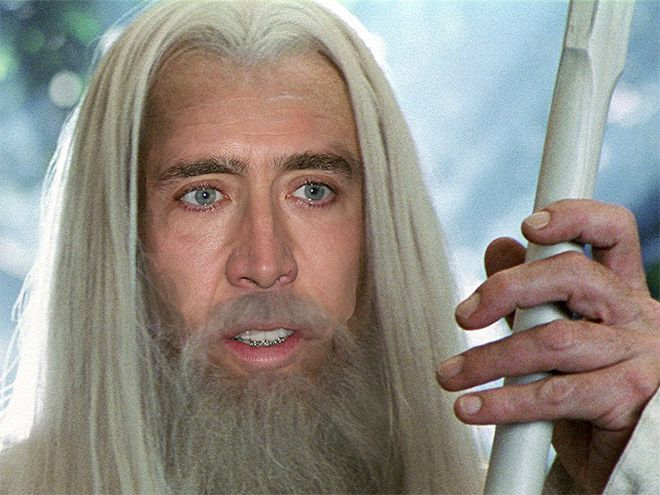

In [54]:
from keras.preprocessing import image
import numpy as np 
from IPython.display import Image
import os

predict_path = os.getcwd() + '/Predict'
for file in os.listdir(predict_path):
    if not file.startswith('.'):
        file = predict_path + "/" + file
        
        image_sample = image.load_img(file, target_size = (200, 200))
        image_sample = image.img_to_array(image_sample)
        image_sample = np.expand_dims(image_sample, axis = 0)
        
        predict(image_sample)